<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

2023-02-28 20:10:31.028984: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-02-28 20:10:31.066626: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-02-28 20:10:31.067239: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-28 20:10:31.756419: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


4422102/4422102 [==============================] - 2s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [2]:
from matplotlib import pyplot as plt

In [4]:
type(x_train)

numpy.ndarray

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

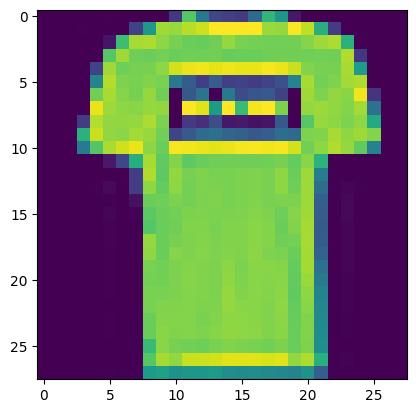

In [9]:
plt.imshow(x_train[1])

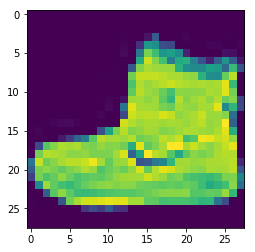

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [11]:
x_train.max()

255

In [12]:
x_train = x_train / 255
x_test = x_test / 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [19]:
x_train.shape

(60000, 28, 28)

In [16]:
x_test.shape

(10000, 28, 28)

In [20]:
img_size = (x_train.shape[1], x_train.shape[2])
num_train = x_train.shape[0]
num_test = x_test.shape[0]
color_channels = 1

In [22]:
color_channels

1

In [23]:
x_train = x_train.reshape(num_train, img_size[0], img_size[1], color_channels)
x_test = x_test.reshape(num_test, img_size[0], img_size[1], color_channels)

In [24]:
x_train.shape

(60000, 28, 28, 1)

In [25]:
x_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [26]:
from tensorflow.keras.utils import to_categorical

In [28]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [29]:
y_train.max()

9

In [31]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [32]:
from datetime import datetime
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [50]:
log_time = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
log_dir = os.path.join(os.getcwd(), 'project_logs', log_time)

In [52]:
img_size

(28, 28)

In [53]:
28*28

784

In [51]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
board = TensorBoard(
    log_dir=log_dir,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1,
)

2023-02-28 20:28:55.480122: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-02-28 20:28:55.480190: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-02-28 20:28:55.482621: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


In [64]:
model = Sequential()

# Conv-pool layer pairs
model.add(Conv2D(filters=32, kernel_size=(4,4)))
model.add(MaxPool2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=16, kernel_size=(8,8)))
model.add(MaxPool2D(pool_size=(4,4)))

# Flatten the output for Dense layers
model.add(Flatten())

# # Multiple Hidden layers with dropout
model.add(Dense(28*28, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))

# # Output layer
model.add(Dense(10, activation='softmax'))

# Problem setup
model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [66]:
model.fit(x_train,
          y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping, board])

Epoch 1/10
  23/1875 [..............................] - ETA: 13s - loss: 1.9000 - accuracy: 0.2880

2023-02-28 20:39:46.999657: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2023-02-28 20:39:46.999673: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2023-02-28 20:39:47.009299: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2023-02-28 20:39:47.010218: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


1875/1875 [==============================] - 14s 7ms/step - loss: 0.5492 - accuracy: 0.8005 - val_loss: 0.4004 - val_accuracy: 0.8604
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3942 - accuracy: 0.8616 - val_loss: 0.4076 - val_accuracy: 0.8599
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3624 - accuracy: 0.8732 - val_loss: 0.3921 - val_accuracy: 0.8658
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3507 - accuracy: 0.8785 - val_loss: 0.4186 - val_accuracy: 0.8466
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3437 - accuracy: 0.8802 - val_loss: 0.4197 - val_accuracy: 0.8568
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3431 - accuracy: 0.8817 - val_loss: 0.4253 - val_accuracy: 0.8488


In [68]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 5, 5, 16)          32784     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 1, 1, 16)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 784)              

{}

Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1802 - acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1679 - acc: 0.9395
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1579 - acc: 0.9439
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1502 - acc: 0.9469
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1427 - acc: 0.9496
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1397 - acc: 0.9523
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1312 - acc: 0.9551
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1274 - acc: 0.9559
Epoch 9/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1238 - acc: 0.9582
Epoch 10/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1201 - acc: 0.9588

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [69]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
prediction_prob = model.predict(x_test)
y_pred = np.argmax(prediction_prob, axis=1)

313/313 [==============================] - 1s 2ms/step


In [80]:
y_pred.shape

(10000,)

In [83]:
np.argmax(y_test, axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [81]:
y_test.shape

(10000, 10)

In [85]:
print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78      1000
           1       0.99      0.95      0.97      1000
           2       0.81      0.76      0.79      1000
           3       0.77      0.95      0.85      1000
           4       0.81      0.76      0.78      1000
           5       0.96      0.92      0.94      1000
           6       0.60      0.68      0.64      1000
           7       0.82      0.99      0.89      1000
           8       0.98      0.92      0.95      1000
           9       0.98      0.86      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



Predict an image

In [91]:
test_img = x_test[69].reshape(1, img_size[0], img_size[1], color_channels)

In [92]:
img_pred = model.predict(test_img)

1/1 [==============================] - 0s 18ms/step


In [93]:
img_pred

array([[4.4021464e-18, 1.0799555e-22, 1.4902564e-16, 8.6995834e-18,
        1.3161547e-17, 3.4008737e-17, 2.4670478e-16, 3.0929387e-19,
        1.0000000e+00, 1.7890902e-22]], dtype=float32)

In [94]:
np.argmax(img_pred, axis=1)

array([8])

In [97]:
y_test[69].shape

(10,)

In [99]:
np.argmax(y_test[69].reshape(10, 1), axis=0)

array([8])

             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



# Great Job!